# Heart Disease Prediction using Machine Learning Approach


Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1
cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the **American Heart Association** indicates that:
* 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
* On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
* On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

This notebook is divided into 13 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [OUtlier Detection & Removal](#data-out)
7. [Training & Test Split](#data-train)
8. [Cross Validation](#cross-val)
9. [Model Building](#data-model)
10. [Model evaluation & comparison](#model-eval)<br>
11. [Feature Selection](#model-eval)<br>
12. [Model Evaluation](#model-inter)
13. [Conclusion](#data-conc)

## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


## 2. Importing Libraries<a id='imp-lib'></a>

In [7]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 


from scipy import stats


## 3. Loading Dataset<a id='data-load'></a>

In [10]:
dt = pd.read_csv("heart_statlog_cleveland_hungary_final (1).csv")

Lets see some of the sample entries of dataset

In [11]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [12]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [13]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [14]:
dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [15]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [16]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [17]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [18]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [19]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [22]:
# first checking the shape of the dataset
dt.shape

(1189, 12)

So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [23]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [25]:
# summary statistics of categorical columns
dt.describe(include=[object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


### Distribution of Heart disease (target variable)

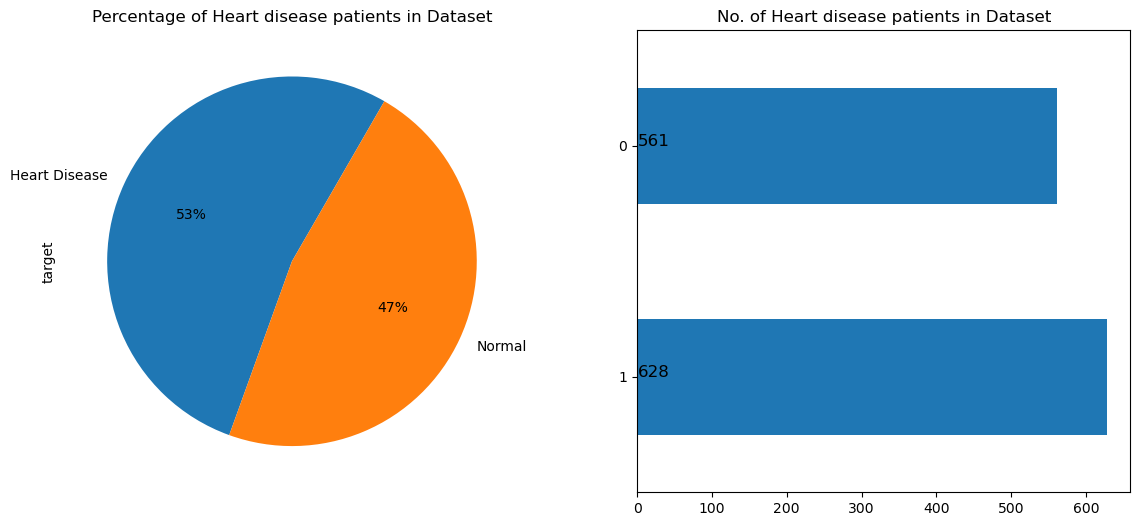

In [26]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

### Checking Gender & Agewise Distribution

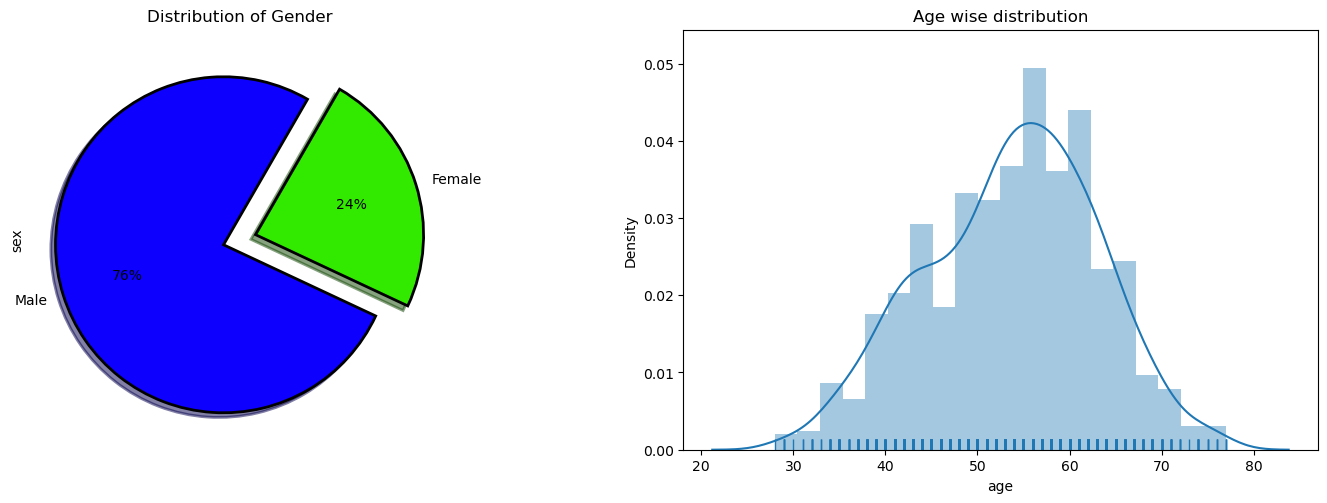

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

# Create separate dataframes for patients with and without heart disease
attr_1 = dt[dt['target'] == 1]
attr_0 = dt[dt['target'] == 0]

# Plotting age distribution for normal patients
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(attr_0['age'], kde=False, bins=20, color='skyblue')
plt.title('Age Distribution of Normal Patients', fontsize=15, weight='bold')

# Plotting gender distribution for normal patients
plt.subplot(1, 2, 2)
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('Gender Distribution of Normal Patients', fontsize=15, weight='bold')
plt.show()

# Plotting age distribution for heart disease patients
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(attr_1['age'], kde=False, bins=20, color='salmon')
plt.title('Age Distribution of Heart Disease Patients', fontsize=15, weight='bold')

# Plotting gender distribution for heart disease patients
plt.subplot(1, 2, 2)
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('Gender Distribution of Heart Disease Patients', fontsize=15, weight='bold')
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

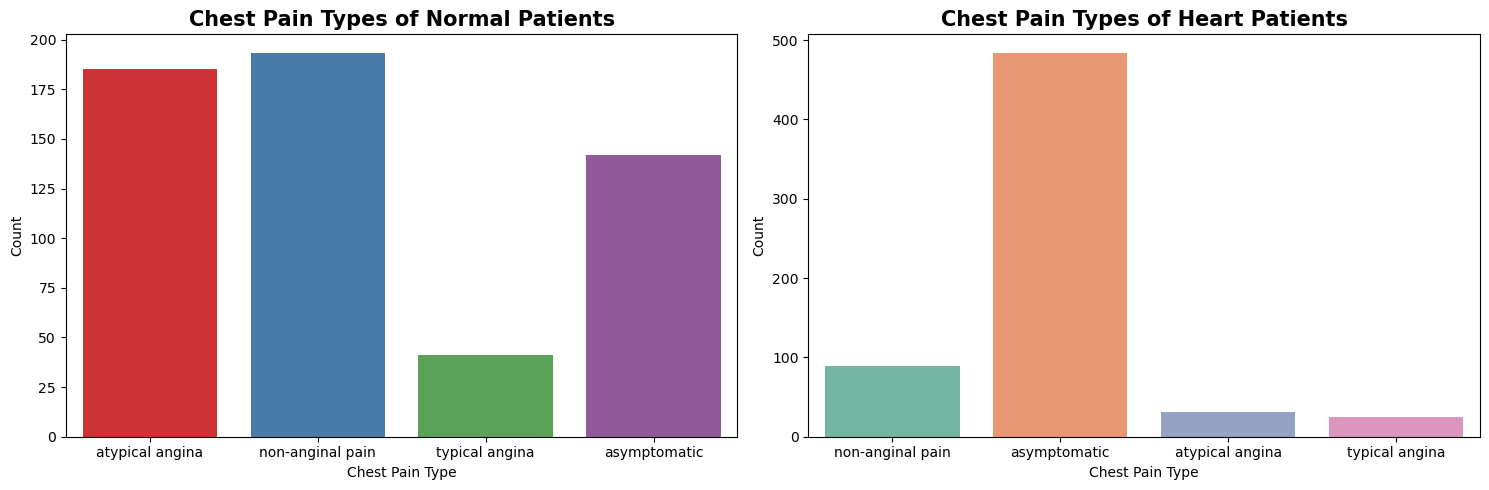

In [32]:
# pl# Plotting chest pain types for normal patients
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=attr_0, x='chest_pain_type', palette='Set1')
plt.title('Chest Pain Types of Normal Patients', fontsize=15, weight='bold')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Plotting chest pain types for heart patients
plt.subplot(1, 2, 2)
sns.countplot(data=attr_1, x='chest_pain_type', palette='Set2')
plt.title('Chest Pain Types of Heart Patients', fontsize=15, weight='bold')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [33]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


As we can see from above plot **76%** of the chest pain type of the heart disease patients have asymptomatic chest pain. 

Asymptomatic heart attacks medically known as **silent myocardial infarction (SMI)** annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

### Distribution of Rest ECG

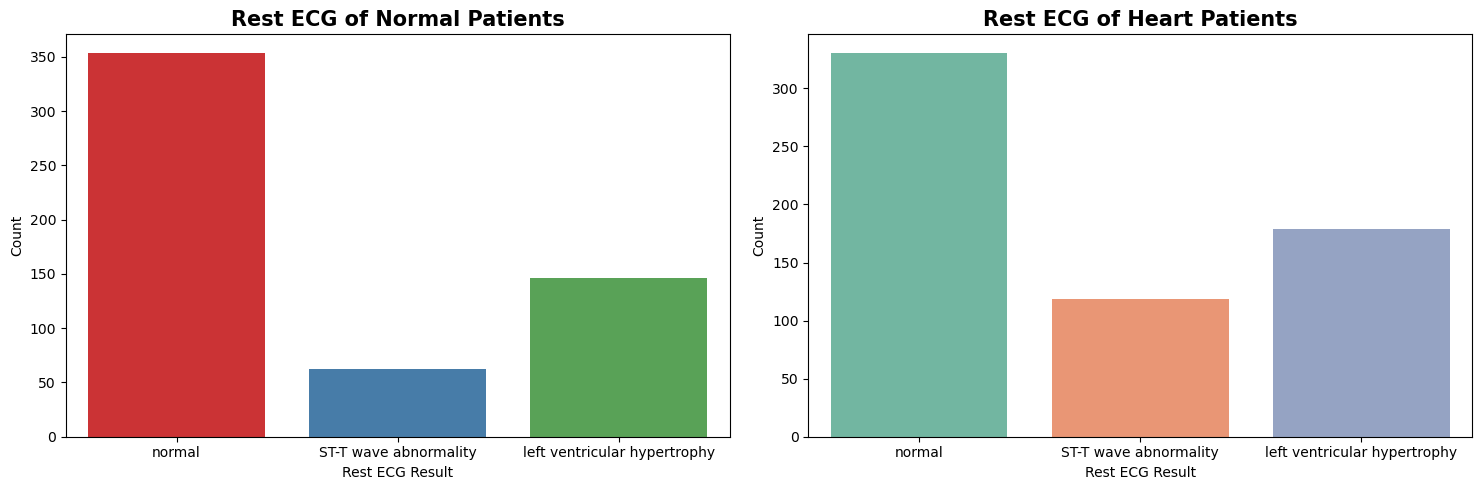

In [35]:
# Plotting resting electrocardiographic results for normal patients
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=attr_0, x='rest_ecg', palette='Set1')
plt.title('Rest ECG of Normal Patients', fontsize=15, weight='bold')
plt.xlabel('Rest ECG Result')
plt.ylabel('Count')

# Plotting resting electrocardiographic results for heart patients
plt.subplot(1, 2, 2)
sns.countplot(data=attr_1, x='rest_ecg', palette='Set2')
plt.title('Rest ECG of Heart Patients', fontsize=15, weight='bold')
plt.xlabel('Rest ECG Result')
plt.ylabel('Count')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [36]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


![](https://i.ibb.co/R3V4tWC/heart1.png)
An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

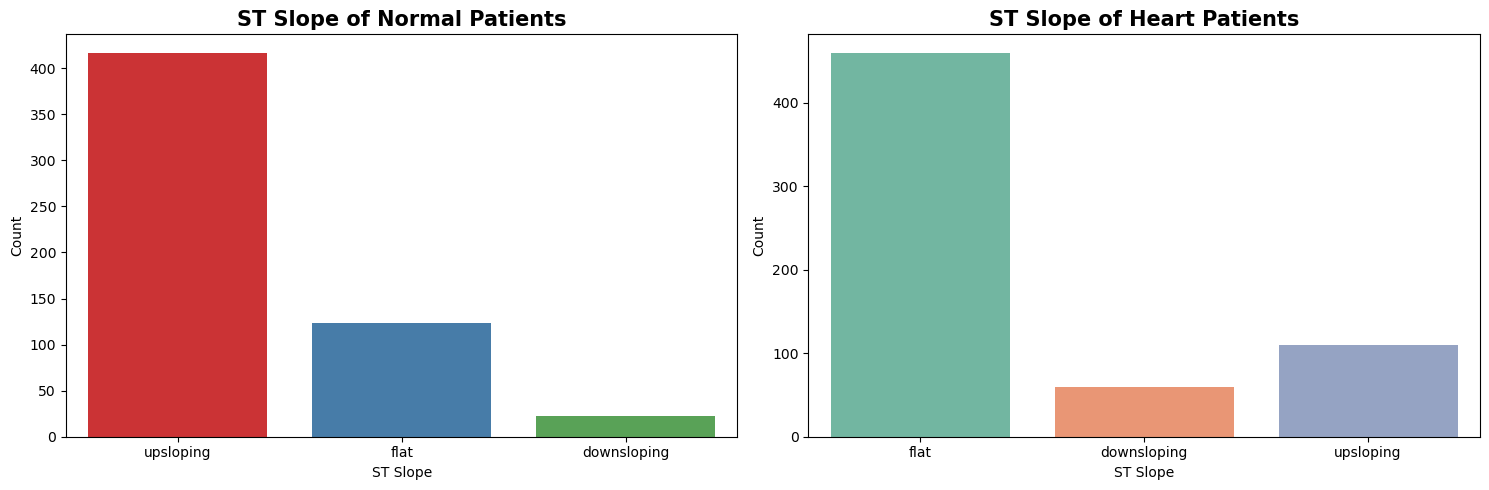

In [38]:
# plotting normal patients
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting ST slope for normal patients
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=attr_0, x='st_slope', palette='Set1')
plt.title('ST Slope of Normal Patients', fontsize=15, weight='bold')
plt.xlabel('ST Slope')
plt.ylabel('Count')

# Plotting ST slope for heart patients
plt.subplot(1, 2, 2)
sns.countplot(data=attr_1, x='st_slope', palette='Set2')
plt.title('ST Slope of Heart Patients', fontsize=15, weight='bold')
plt.xlabel('ST Slope')
plt.ylabel('Count')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [39]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000



The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers. 

As we can see from above plot upsloping is positive sign as 74% of the normal patients have upslope where as 72.97% heart patients have flat sloping.

### Distribution of Numerical features

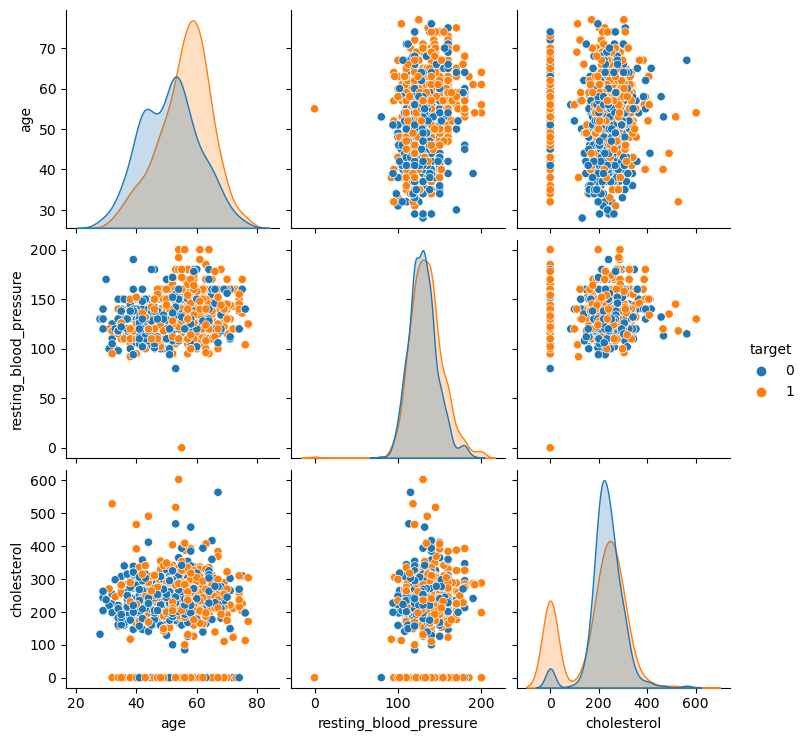

In [40]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

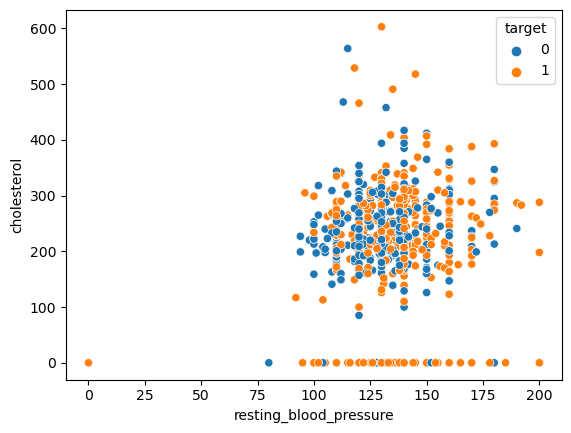

In [41]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

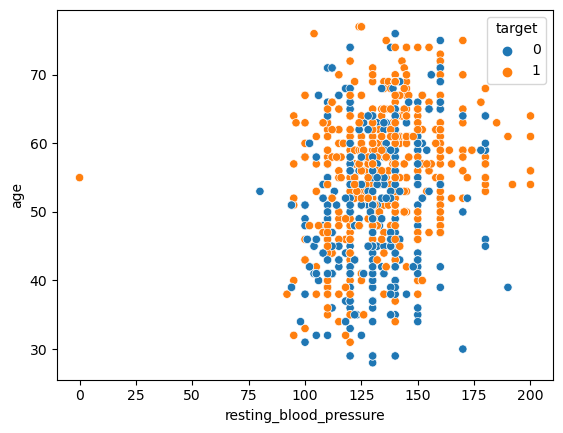

In [42]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## 6. Outlier Detection & Removal <a id='data-out'></a>

### Detecting outlier using z-score
![](https://i.ibb.co/bgRRWrp/outlier.jpg)
![](https://i.ibb.co/jDHP7Sj/Z-score-formula.jpg)

In [43]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [44]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [45]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [46]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [47]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [48]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

Great !! all the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate feature and target variable.

In [49]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [50]:
# checking the shape of dataset
dt.shape

(1172, 16)

In [51]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## Checking Correlation 

<Axes: title={'center': 'Correlation with Diabetes'}>

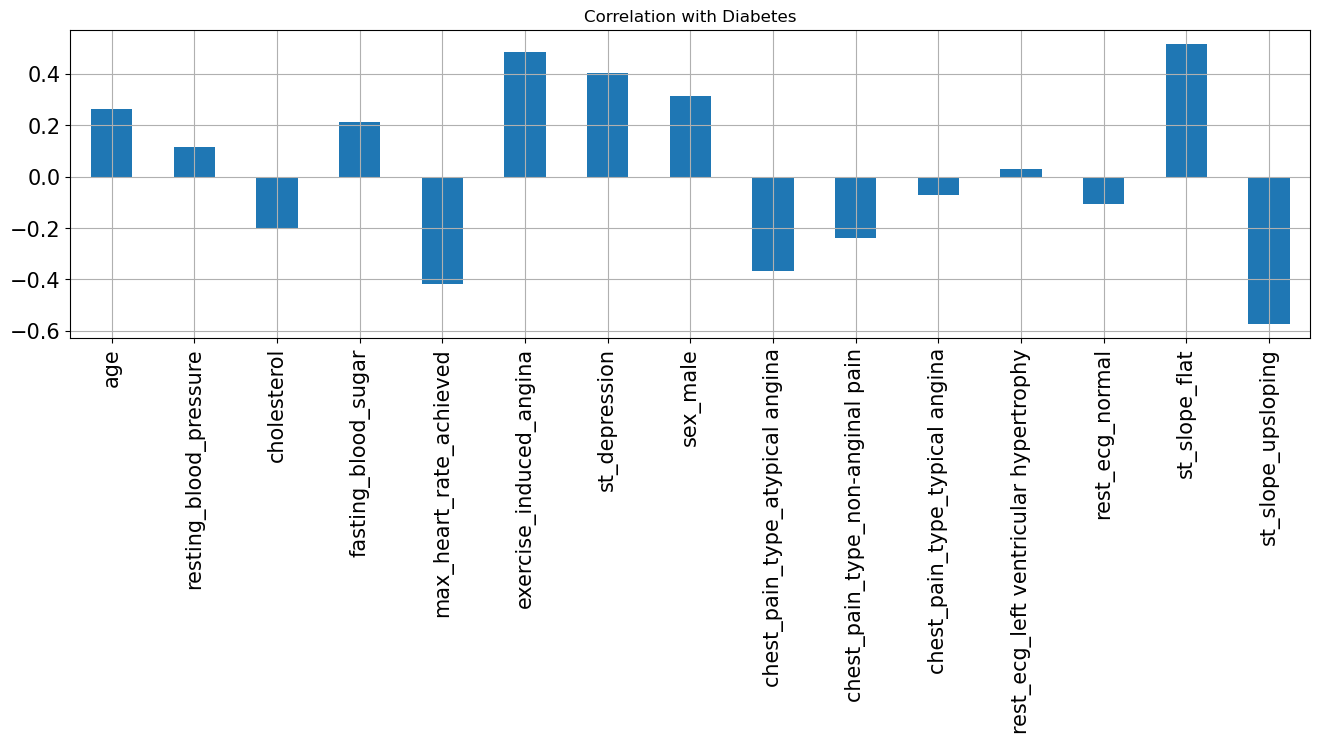

In [52]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


## 7. Train Test Split <a id='data-train'></a>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [54]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [55]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [65]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


## 9. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [81]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100)
model.fit(X_train, y_train)
y_pred_rfe = model.predict(X_test)
print(y_pred_rfe)

[1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 1 1]


In [93]:
import pickle

In [102]:
filename = "rmtrained_model.pkl"
pickle.dump(model ,open(filename ,"wb"))

In [103]:
input_data = (45, 120, 180, 0, 160, 0, 0.5, 0, 0, 1, 0, 0, 1, 0, 1) 

# change the input data to a numpy array

input_data_as_numpy_array =np.asarray(input_data)

# reshaping the numoy array as we are predicitng for only on instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predicition  =  loaded_model.predict(input_data_reshaped)


print(predicition)

if(predicition[0] == 0 ):
  print("THE person does not have a Heart disease")
else:
    print("THE person has a Heart disease")

[0]
THE person does not have a Heart disease
